In [8]:
import cobra
import PyDSTool as dst
import os
HOME = os.path.expanduser('~')
# PATH = '/data/amogh-jalihal/Problem-Solving/datasets/Bacteroides_sp_9_1_42FAA.xml'
PATH = HOME + '/Documents/VT/Problem-Solving/data/AGORA/' + 'Bacteroides_sp_9_1_42FAA.xml'

In [9]:
model = cobra.io.read_sbml_model(PATH)

# Extract exchange reactions into variable definition and ics dictionary

In [10]:
InFlux_VarDef = dict()
InFlux_ICS = dict()
solution = model.optimize()

name_mapper= {}

def checkname(reaction_id):
    numbers = ['0', '1', '2',
              '3', '4', '5', '6',
              '7', '8', '9']
    #for i in range(0,len(reaction_id)):
    #    if reaction_id[i] in numbers:
            

all_exchanges = model.exchanges
for r in all_exchanges:
    if solution.fluxes[r.id] <=0.0:
        InFlux_VarDef[r.reactants[0].id] = '-V * ' + \
                                            r.reactants[0].id + \
                                            '/(Km + ' + r.reactants[0].id + ' )'
        InFlux_ICS[r.reactants[0].id] = -1*solution.fluxes[r.id]
Wrong_Names = ['26dap_M_e', '2obut_e', '4hba_c', '4hbz_e']

Corrected_VarDef = {}
Corrected_ICS = {}

for k in InFlux_VarDef.keys():
    if k not in Wrong_Names:
        Corrected_VarDef[k] = InFlux_VarDef[k]
        Corrected_ICS[k] = InFlux_ICS[k]

# Translate to Model definition

In [11]:
P = ModelDS.compute('test').sample()

NameError: name 'ModelDS' is not defined

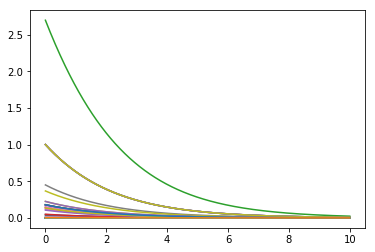

In [87]:
import matplotlib.pyplot as plt
for var in ModelDS.variables.keys():
    plt.plot(P['t'], P[var])
plt.show()

In [70]:
for k in Corrected_ICS.keys():
    if abs(Corrected_ICS[k]) > 0.0:
        print(k, Corrected_ICS[k])

acgam_e 1.0
adn_e 1.0
arab_L_e 0.178783
arg_L_e 0.15
asn_L_e 0.225
ca2_e 0.00247421531545
chor_e 0.117214897125
cit_e 0.0049484306309
cl_e 0.00247421531545
cobalt2_e 0.00247421531545
cu2_e 0.00247421531545
cys_L_e 0.033139543747
cytd_e 1.0
dcyt_e 0.00372174652477
ddca_e 0.0460790682356
drib_e 0.178783
fe2_e 0.00247421531545
fe3_e 0.00247421531545
glu_L_e 0.18
gly_e 0.45
gsn_e 1.0
h2o_e 2.69569517145
h2s_e 0.0497889021299
k_e 0.00247421531545
leu_L_e 0.138978575854
lys_L_e 0.105677071026
mg2_e 0.00247421531545
mn2_e 0.00247421531545
nac_e 0.0049484306309
orn_e 1.0
pi_e 0.367598047991
pro_L_e 0.18
pydxn_e 0.00247421531545
rib_D_e 0.178783
rmn_e 0.148986
ser_L_e 1.0
so4_e 0.00247421531545
thr_L_e 0.225
thymd_e 0.00372174652477
ttdca_e 0.00921581364711
val_L_e 0.135353714499
xyl_D_e 0.178783
zn2_e 0.00247421531545


In [82]:
all_exchanges
type(model.reactions.get_by_id('DM_4HBA'))

cobra.core.reaction.Reaction

In [83]:
model.summary()

IN FLUXES                OUT FLUXES         OBJECTIVES
-----------------------  -----------------  -----------------
h2o_e           2.7      ppa_e      7.74    biomass484  0.317
2obut_e         1        h_e        5.34
acgam_e         1        nh4_e      5.1
adn_e           1        co2_e      3.84
cytd_e          1        ac_e       2.16
gsn_e           1        gua_e      0.954
orn_e           1        for_e      0.925
ser_L_e         1        uri_e      0.914
gly_e           0.45     ade_e      0.901
pi_e            0.368    biomass_c  0.317
dnarep_c        0.317    lac_L_e    0.149
proteinsynth_c  0.317    urea_e     0.0587
rnatrans_c      0.317
asn_L_e         0.225
thr_L_e         0.225
glu_L_e         0.18
pro_L_e         0.18
arab_L_e        0.179
drib_e          0.179
rib_D_e         0.179
xyl_D_e         0.179
arg_L_e         0.15
rmn_e           0.149
leu_L_e         0.139
val_L_e         0.135
chor_e          0.117
lys_L_e         0.106
h2s_e           0.0498
ddca_e       

In [85]:
model.metabolites.get_by_id('pi_e')

Metabolite identifier,pi_e
Name,hydrogenphosphate
Memory address,0x07f450a3b1518
Formula,HO4P
Compartment,e
In 4 reaction(s),"EX_pi_LPAREN_e_RPAREN_, PIt6b, PIabc, PIt7ir"
